In [150]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
import numpy as np
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot as plt

In [151]:
data = pd.read_excel(r'C:\Users\mbauer2\workspace\Uni\enterprise-ai-project\ImmmoWelt_Price_Guide\all_objects_wue_preprocessed.xlsx')

In [152]:
data.replace('""', np.nan, inplace=True)

In [153]:
data['DistributionType'].unique()

array(['BUY', 'COMPULSORY_AUCTION', 'RENT', nan], dtype=object)

In [156]:
data = data[data['DistributionType']=='BUY']

In [186]:
data[data['EstateType']=='HOUSE']

,Object_price,LivingSpace,Rooms,ConstructionYear,ZipCode,EstateType,DistributionType,abrissobjekt,abstellraum,alarmanlage,...,tiefgarage,unterkellert,vermietet,vollerschlossen,wanne,wasch_trockenraum,wg_geeignet,wintergarten,wohnberechtigungsschein,zentralheizung
252,379000,140.00,7.0,1934.0,97249.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
253,1250000,413.00,12.0,1993.0,97265.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
254,700000,170.00,7.0,1984.0,97076.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
255,499000,137.00,4.0,1984.0,97084.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
256,1295000,190.00,7.0,1978.0,97074.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1700000,250.00,7.0,2012.0,97084.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
388,690000,276.00,10.0,1974.0,97209.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,595000,177.00,7.0,1983.0,97297.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
390,399000,189.91,9.0,1952.0,97222.0,HOUSE,BUY,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
data['ConstructionYear'].isnull().sum()
print(data.isnull().sum())

Unnamed: 0                  0
Object_price                8
LivingSpace                 3
Rooms                      14
ConstructionYear           52
                           ..
wasch_trockenraum           0
wg_geeignet                 0
wintergarten                0
wohnberechtigungsschein     0
zentralheizung              0
Length: 110, dtype: int64


In [158]:
data.dropna(inplace=True)
data["LivingSpace"] = pd.to_numeric(data["LivingSpace"], errors="coerce")
data["Rooms"] = pd.to_numeric(data["Rooms"], errors="coerce")
data.dropna(subset=['ConstructionYear'], inplace=True)
data.dropna(subset=['Object_price'], inplace=True)
data.dropna(subset=['Rooms'], inplace=True)
data.dropna(subset=['LivingSpace'], inplace=True)
#data.drop('Title', axis=1, inplace=True)
data.drop('Unnamed: 0', axis=1, inplace=True)
#data.drop('Object_currency', axis=1, inplace=True)
#data.drop('Url', axis=1, inplace=True)
#data.drop('EstateType', axis=1, inplace=True)
#data.drop('DistributionType', axis=1, inplace=True)
data['ZipCode']= data['ZipCode'].astype(str)
data['LivingSpace']= data['LivingSpace'].astype(float)
data = data.reindex()

In [159]:
data

,Object_price,LivingSpace,Rooms,ConstructionYear,ZipCode,EstateType,DistributionType,abrissobjekt,abstellraum,alarmanlage,...,tiefgarage,unterkellert,vermietet,vollerschlossen,wanne,wasch_trockenraum,wg_geeignet,wintergarten,wohnberechtigungsschein,zentralheizung
2,220000,53.00,2.0,1971.0,97080.0,APARTMENT,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,269000,70.00,3.0,1968.0,97078.0,APARTMENT,BUY,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
5,169000,33.51,1.0,1983.0,97072.0,APARTMENT,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,275000,65.45,2.0,1958.0,97072.0,APARTMENT,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,239000,79.50,3.0,1977.0,97209.0,APARTMENT,BUY,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615,1700000,250.00,7.0,2012.0,97084.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
616,690000,276.00,10.0,1974.0,97209.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
618,595000,177.00,7.0,1983.0,97297.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
619,399000,189.91,9.0,1952.0,97222.0,HOUSE,BUY,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [160]:
print(data.isnull().sum())

Object_price               0
LivingSpace                0
Rooms                      0
ConstructionYear           0
ZipCode                    0
                          ..
wasch_trockenraum          0
wg_geeignet                0
wintergarten               0
wohnberechtigungsschein    0
zentralheizung             0
Length: 109, dtype: int64


In [161]:
data = data.reset_index(drop=True)

In [162]:
data

,Object_price,LivingSpace,Rooms,ConstructionYear,ZipCode,EstateType,DistributionType,abrissobjekt,abstellraum,alarmanlage,...,tiefgarage,unterkellert,vermietet,vollerschlossen,wanne,wasch_trockenraum,wg_geeignet,wintergarten,wohnberechtigungsschein,zentralheizung
0,220000,53.00,2.0,1971.0,97080.0,APARTMENT,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,269000,70.00,3.0,1968.0,97078.0,APARTMENT,BUY,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
2,169000,33.51,1.0,1983.0,97072.0,APARTMENT,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,275000,65.45,2.0,1958.0,97072.0,APARTMENT,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,239000,79.50,3.0,1977.0,97209.0,APARTMENT,BUY,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,1700000,250.00,7.0,2012.0,97084.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
388,690000,276.00,10.0,1974.0,97209.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
389,595000,177.00,7.0,1983.0,97297.0,HOUSE,BUY,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
390,399000,189.91,9.0,1952.0,97222.0,HOUSE,BUY,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [163]:
y = data['Object_price']
X = data.drop('Object_price', axis=1)
print(y.head())
print(X.head())

0    220000
1    269000
2    169000
3    275000
4    239000
Name: Object_price, dtype: object
   LivingSpace  Rooms  ConstructionYear  ZipCode EstateType DistributionType  \
0        53.00    2.0            1971.0  97080.0  APARTMENT              BUY   
1        70.00    3.0            1968.0  97078.0  APARTMENT              BUY   
2        33.51    1.0            1983.0  97072.0  APARTMENT              BUY   
3        65.45    2.0            1958.0  97072.0  APARTMENT              BUY   
4        79.50    3.0            1977.0  97209.0  APARTMENT              BUY   

   abrissobjekt  abstellraum  alarmanlage  als_ferienimmobilie_geeignet  ...  \
0           0.0          0.0          0.0                           0.0  ...   
1           0.0          0.0          0.0                           0.0  ...   
2           0.0          0.0          0.0                           0.0  ...   
3           0.0          0.0          0.0                           0.0  ...   
4           0.0          

In [180]:
train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                  train_size=0.8, 
                                                  random_state = 42)
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, 
                                                  train_size=0.8, 
                                                  random_state = 42)

In [181]:
num_cols = [col for col in train_X.columns if train_X[col].dtype == 'float64']
cat_cols = [col for col in train_X.columns if train_X[col].dtype == 'object']
#bin_cols = [col for col in train_X.columns if train_X[col].dtype == 'int64']


In [182]:
print(cat_cols)

['ZipCode', 'EstateType', 'DistributionType']


In [183]:
encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical_xgb = encoder.fit_transform(train_X[cat_cols]).toarray()
X_valid_categorical_xgb = encoder.transform(val_X[cat_cols]).toarray()
X_test_categorical_xgb = encoder.transform(test_X[cat_cols]).toarray()
X_train_processed = np.concatenate([train_X[num_cols], X_train_categorical_xgb], axis=1)
X_valid_processed = np.concatenate([val_X[num_cols], X_valid_categorical_xgb], axis=1)
X_test_processed = np.concatenate([test_X[num_cols], X_test_categorical_xgb], axis=1)
#X_train_processed = np.concatenate([train_X[bin_cols], X_train_processed], axis=1)
#X_valid_processed = np.concatenate([val_X[bin_cols], X_valid_processed], axis=1)
#X_test_processed = np.concatenate([test_X[bin_cols], X_test_processed], axis=1)

In [184]:
X_train_processed[0]

array([2.030e+02, 7.000e+00, 1.987e+03, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 

In [185]:
model = xgb.XGBRegressor(eval_metric=['rmse', 'mae'], early_stopping_rounds=30)
model.fit(X=X_train_processed, 
          y=train_y,
          eval_set=[(X_valid_processed, val_y)],  # Liste mit Validierungsdaten und Zielvariablen
          verbose=True
)

preds= model.predict(X_test_processed)
preds_apartment = preds[test_X['EstateType']=='APARTMENT']
test_y_apartment = test_y[test_X['EstateType']=='APARTMENT']
preds_House = preds[test_X['EstateType']=='HOUSE']
test_y_House= test_y[test_X['EstateType']=='HOUSE']
score_House = mean_absolute_error(test_y_House, preds_House)
score_apartment = mean_absolute_error(test_y_apartment, preds_apartment)

print("MAE House: {}".format(score_House))
print("MAE Apartment: {}".format(score_apartment))

[0]	validation_0-rmse:634868.30974	validation_0-mae:398016.45387
[1]	validation_0-rmse:560561.15681	validation_0-mae:310720.67225
[2]	validation_0-rmse:512068.08674	validation_0-mae:258217.61285
[3]	validation_0-rmse:493461.10296	validation_0-mae:223800.78745
[4]	validation_0-rmse:468318.28863	validation_0-mae:202258.81944
[5]	validation_0-rmse:451033.26804	validation_0-mae:187403.68837
[6]	validation_0-rmse:439507.33759	validation_0-mae:177084.78187
[7]	validation_0-rmse:431743.62941	validation_0-mae:173481.46714
[8]	validation_0-rmse:422318.72034	validation_0-mae:168616.66109
[9]	validation_0-rmse:417784.23840	validation_0-mae:165401.89472
[10]	validation_0-rmse:417142.17203	validation_0-mae:164966.52245
[11]	validation_0-rmse:411256.99504	validation_0-mae:162786.67287


[12]	validation_0-rmse:410713.39820	validation_0-mae:162680.79452
[13]	validation_0-rmse:410369.90564	validation_0-mae:162180.73772
[14]	validation_0-rmse:410720.43219	validation_0-mae:162345.86372
[15]	validation_0-rmse:410464.69674	validation_0-mae:161739.12264
[16]	validation_0-rmse:410583.05890	validation_0-mae:162240.44358
[17]	validation_0-rmse:410629.19939	validation_0-mae:161955.31002
[18]	validation_0-rmse:410709.61972	validation_0-mae:161341.13740
[19]	validation_0-rmse:410417.18956	validation_0-mae:160755.10330
[20]	validation_0-rmse:409830.95585	validation_0-mae:160224.97879
[21]	validation_0-rmse:409136.50531	validation_0-mae:160209.11148
[22]	validation_0-rmse:409580.37764	validation_0-mae:160659.21788
[23]	validation_0-rmse:409632.03361	validation_0-mae:160642.08395
[24]	validation_0-rmse:409469.33917	validation_0-mae:160542.29898
[25]	validation_0-rmse:409134.22220	validation_0-mae:160465.52641
[26]	validation_0-rmse:409127.24426	validation_0-mae:160482.79700
[27]	valid

In [145]:
model2 = lgb.LGBMRegressor(metric=['rmse', 'mae'], early_stopping_rounds=30)
model2.fit(X=X_train_processed, 
          y=train_y,
          eval_set=[(X_valid_processed, val_y)], 
          verbose=True
)

preds= model2.predict(X_test_processed)
score = mean_absolute_error(test_y, preds)

print("MAE: {}".format(score))


c:\Python311\Lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


ValueError: Series.dtypes must be int, float or bool

In [146]:
n_estimators = [10, 50, 100, 200, 300, 400, 500]
train_maes = []
valid_maes = []
for n in n_estimators:
    
    rf_model = RandomForestRegressor(n_estimators=n, random_state=0)
    rf_model.fit(X_train_processed, train_y)

    
    preds_train_rf = rf_model.predict(X_train_processed)
    preds_valid_rf = rf_model.predict(X_valid_processed)

    
    train_mae = mean_absolute_error(train_y, preds_train_rf)
    valid_mae = mean_absolute_error(val_y, preds_valid_rf)

    
    train_maes.append(train_mae)
    valid_maes.append(valid_mae)

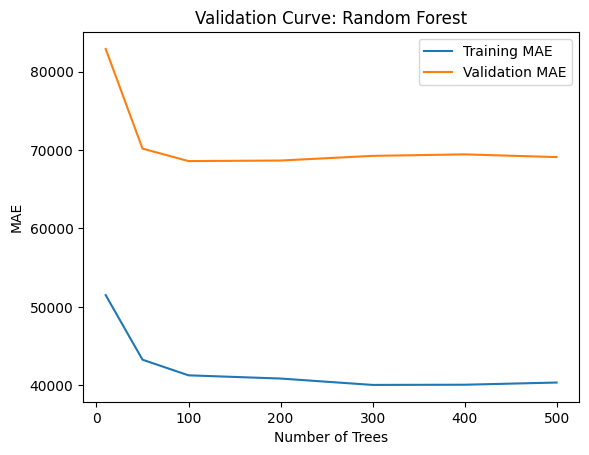

In [170]:
plt.plot(n_estimators, train_maes, label='Training MAE')
plt.plot(n_estimators, valid_maes, label='Validation MAE')
plt.xlabel('Number of Trees')
plt.ylabel('MAE')
plt.legend()
plt.title('Validation Curve: Random Forest')
plt.show()

In [171]:
rf_model = RandomForestRegressor(n_estimators=300, random_state=0)
rf_model.fit(X_train_processed, train_y)
preds_test_rf = rf_model.predict(X_test_processed)
score = mean_absolute_error(test_y, preds_test_rf)
print("MAE: {}".format(score))

MAE: 129732.24348603576
